### Ridge

- Transform the Boston House dataset using polynomial transformation and split the dataset into test and train datasets
- Run cross validation with Ridge Regression
- Plot the coefficients of the model

In [1]:
# import matplotlib.pyplot as plt
# #% matplotlib inline
# import numpy as np
# np.random.seed(42)
# plt.rcParams['savefig.dpi'] = 300
# plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
# from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [3]:
# from sklearn.model_selection import cross_val_score

In [4]:
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale
# from sklearn.impute import SimpleImputer
# from sklearn.datasets import load_boston
# from sklearn.model_selection import train_test_split


# boston = load_boston()
# X, y = boston.data, boston.target
# #X, y = data.data, data.target


# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# scaler=StandardScaler()
# imputer=SimpleImputer(strategy='median')
# poly=PolynomialFeatures(include_bias=False)
# ridge=Ridge()

# X_train_poly = poly.fit_transform(imputer.fit_transform(scaler.fit_transform(X_train)))
# X_test_poly= poly.transform(imputer.transform(scaler.transform(X_test)))
# print(X_train_poly.shape)

(379, 104)


In [5]:
# np.mean(cross_val_score(Ridge(), X_train_poly, y_train, cv=10))

0.8227504529563292

In [6]:
# ridge.fit(X_train_poly,y_train)
# ridge.score(X_test_poly,y_test)

0.7969314466714328

In [7]:
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale
# from sklearn.impute import SimpleImputer
# from sklearn.datasets import load_boston
# from sklearn.model_selection import train_test_split

# boston = load_boston()
# X, y = boston.data, boston.target
# #X, y = data.data, data.target

In [8]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# ridge_poly = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('imputer', SimpleImputer(strategy='median')),
#     ('poly', PolynomialFeatures(include_bias=False)),
#     ('ridge',Ridge())])

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# np.mean(cross_val_score(ridge_poly, X_train, y_train, cv=10))

0.8220223364511238

In [9]:
# zz=ridge_poly.named_steps['poly'].fit_transform(X_train)

In [10]:
# zz.shape

(379, 104)

In [11]:
# ridge_poly.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge())])

In [12]:
# ridge_poly.score(X_test,y_test)

0.7969314466714328

- Start a grid search for `alpha` value
- Plot the model performance versus the different `alpha` values 

In [13]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'alpha': np.logspace(-3, 3, 13)}

# grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
# grid.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             return_train_score=True)

In [14]:
# import pandas as pd
# results = pd.DataFrame(grid.cv_results_)

In [15]:
# results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

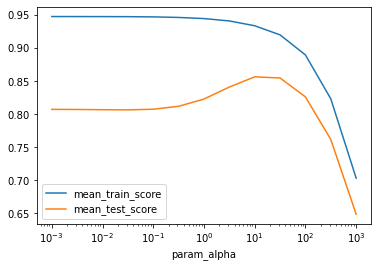

In [16]:
# import pandas as pd
# results = pd.DataFrame(grid.cv_results_)
# results.plot('param_alpha', 'mean_train_score')
# results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
# plt.legend()
# plt.xscale("log")

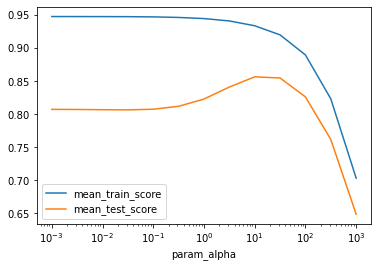

In [18]:
# import pandas as pd
# results = pd.DataFrame(grid.cv_results_)
# results.plot('param_alpha', 'mean_train_score')
# results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

# plt.legend()
# plt.xscale("log")
# plt.savefig("Fig/ridge_alpha_search_poly.png")

- Print the best parameter score
- Print the best model score

In [19]:
# print(grid.best_params_)
# print(grid.best_score_)

{'alpha': 10.0}
0.8563582823131546


In [20]:
# grid.score(X_test_poly, y_test)

0.8054402042295691

- Plot the model coefficients

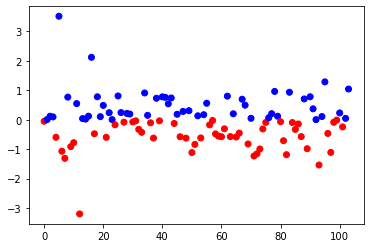

In [21]:
# ridge = grid.best_estimator_
# plt.scatter(range(X_train_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r");
# #plt.savefig("Fig/ridge_coefficients.png")

- Plot the model coefficients for alpha=1, 14, and 100

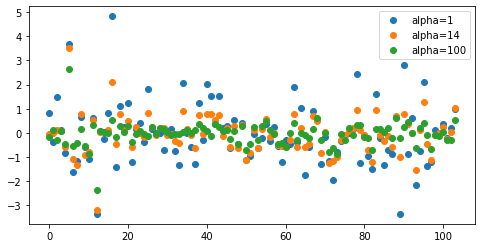

In [22]:
# ridge100 = Ridge(alpha=100).fit(X_train_poly, y_train)
# ridge1 = Ridge(alpha=1).fit(X_train_poly, y_train)
# plt.figure(figsize=(8, 4))

# plt.plot(ridge1.coef_, 'o', label="alpha=1")
# plt.plot(ridge.coef_, 'o', label="alpha=14")
# plt.plot(ridge100.coef_, 'o', label="alpha=100")
# plt.legend();
# #plt.savefig("Fig/ridge_coefficients_alpha.png")

Text(0, 0.5, 'coefficient')

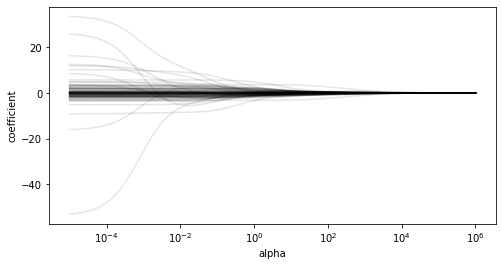

In [23]:
# n_alphas = 200
# alphas = np.logspace(-5, 6, n_alphas)
# plt.figure(figsize=(8, 4))
# coefs = []
# for a in alphas:
#     ridge = Ridge(alpha=a)
#     ridge.fit(X_train_poly, y_train)
#     coefs.append(ridge.coef_)

# plt.plot(alphas, coefs, c='k', alpha=.1)
# plt.xscale("log")
# plt.xlabel("alpha")
# plt.ylabel("coefficient")
# #plt.savefig("images/ridge_coefficient_paths.png")

In [24]:
# coefs[0]

array([ 4.90934479e+00,  3.46540316e+00,  1.25023462e+01,  1.36508585e-01,
       -1.30051076e+00,  3.70756741e+00, -1.77346948e+00, -2.70588953e-01,
        8.43927337e+00, -1.60690881e+01,  2.18741025e+00,  1.24783768e+00,
       -3.33011742e+00,  1.15735103e-01,  1.62406393e+01,  3.35319327e+01,
        5.68684964e+00, -1.78034138e+00,  1.13087808e+00,  3.71583038e-01,
        1.83547155e+00,  2.57846564e+01, -5.31541488e+01,  1.19511993e+01,
       -4.95837461e-01,  2.05581975e+00, -2.32296700e-01, -7.22491585e-01,
       -2.22711793e-01, -3.18742855e+00,  1.47167018e-02,  5.37589174e-01,
       -9.13559896e-01, -3.01234913e+00,  3.15111813e+00, -1.61170327e-01,
        7.36828464e-01, -1.47207801e+00,  2.37534725e+00, -1.87421867e-01,
        3.92735648e-01,  1.74842290e+00,  4.74652365e-01,  1.90734272e+00,
       -1.09129348e+00, -6.40210683e-02, -2.25104785e-01,  1.88580121e+00,
       -7.44346885e-01,  4.34940375e-01, -1.17248859e+00, -1.06565454e+00,
       -2.10108718e-01, -

- Create a learning curve for different data train sizes

In [31]:
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# def plot_learning_curves(model, X, y):
#     X_train, X_val, y_train, y_val = train_test_split(X, y,\
#             test_size=0.2, random_state=10)
#     train_errors, val_errors = [], []
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
#         val_errors.append(mean_squared_error(y_val, y_val_predict))

#     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
#     plt.legend(loc="upper right", fontsize=14)   # not shown in the book
#     plt.xlabel("Training set size", fontsize=14) # not shown
#     plt.ylabel("RMSE", fontsize=14)              # not shown

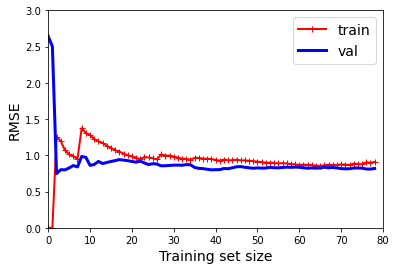

In [32]:
# Xr = 2 * np.random.rand(100, 1)
# yr = 4 + 3 * Xr + np.random.randn(100, 1)
# lin_reg = LinearRegression()
# plot_learning_curves(lin_reg, Xr, yr)
# plt.axis([0, 80, 0, 3])                         # not shown in the book
# #plt.savefig("Fig/underfitting_learning_curves_plot")   # not shown
# plt.show()                                      # not shown

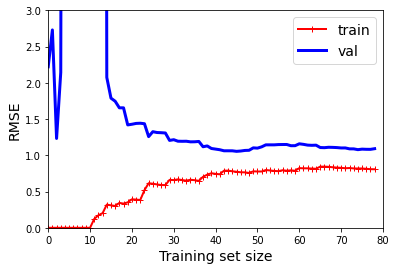

In [27]:
# from sklearn.pipeline import Pipeline

# polynomial_regression = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
#         ("lin_reg", LinearRegression()),
#     ])

# plot_learning_curves(polynomial_regression, Xr, yr)
# plt.axis([0, 80, 0, 3])           # not shown
# #plt.savefig("Fig/learning_curves_plot")  # not shown
# plt.show()                        # not shown

- Create the learning curve plot for different train size and alpha= 1, 14, and 100

(-2.0, 1.0)

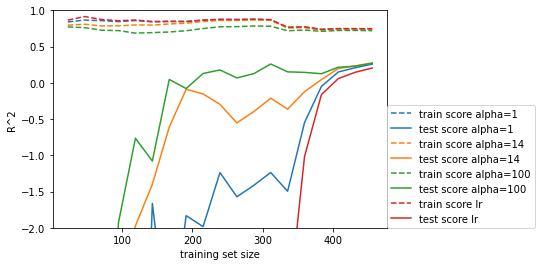

In [29]:
# from sklearn.model_selection import learning_curve
# def plot_learning_curve(est, name):
#     train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
#     test_mean = test_scores.mean(axis=1)
#     train_mean = train_scores.mean(axis=1)
#     line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
#     plt.plot(train_set_size, test_mean, label="test score {}".format(name),
#              c=line.get_color())
    
# plot_learning_curve(Ridge(alpha=1), "alpha=1")
# plot_learning_curve(Ridge(alpha=14), "alpha=14")
# plot_learning_curve(Ridge(alpha=100), "alpha=100")

# plot_learning_curve(LinearRegression(), "lr")
# plt.legend(loc=(1, 0))
# plt.xlabel("training set size")
# plt.ylabel("R^2")
# plt.ylim(-2, 1)
# #plt.savefig("Fig/learning_curves_ridge")

In [37]:
# X.shape

(506, 13)